# Markov Graphs

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import numpy as np

## Probability Models for Graphs

In the context of social networks, we are often interested in modeling the probability of observing a particular network structure. This can be useful for tasks such as link prediction, community detection, and anomaly detection. One common approach is to use probability models for graphs, which assign probabilities to different network structures based on certain assumptions.


**Why do we bother with probability models for graphs and how can they help us in Machine Learning?**
- They provide a principled way to quantify uncertainty in network data.
- They enable the generation of synthetic datasets for training and testing machine learning algorithms.
- They help in understanding and modeling the underlying processes that generate real-world networks.
- They facilitate the development of algorithms for network-based predictions and classifications.
- They allow for the application of statistical inference techniques to uncover hidden structures in network data.

Barabási and Albert (1999) preferential attachment model is a simple example of a probability model for graphs. In this model, new nodes are added to the network one by one, and each new node is connected to existing nodes with a probability that is proportional to the degree of the existing nodes. This leads to a scale-free network with a power-law degree distribution.

Now, we will explore more advanced probability models for graphs, focusing on Markov graphs and their applications in social network analysis.

## Introduction to Markov Graphs

Markov graphs are a class of probability models that capture dependencies between edges in a graph, analogous to Markov chains in time series analysis.

In these models, the set of nodes is fixed while the set of edges is random. A graph is a Markov graph if, for any four distinct nodes $i, j, h, k$, the tie indicators $Y_{ij}$ and $Y_{hk}$ are conditionally independent given the other ties.

The probability distribution for a Markov graph, assuming node labels do not affect the distribution, is given by:

$ P(Y = y) = \frac{\exp(\theta L(y) + \sum_{k=2}^{n-1} \sigma_k S_k(y) + \tau T(y))}{\kappa(\theta, \sigma, \tau)} $

where:
- $L$ is the edge count,
- $T$ is the triangle count,
- $S_k$ is the $k$-star count,
- $\kappa(\theta, \sigma, \tau)$ is a normalization constant ensuring probabilities sum to 1.

For more details, refer to [Snijders, Transitivity and Triads](https://www.stats.ox.ac.uk/~snijders/Trans_Triads.pdf).

### Examples of Graphs Following the Markov Graph Model

**Erdős-Rényi Graphs (G(n, p))**

In an Erdős-Rényi graph, each edge is included in the graph with probability \(p\) independent of every other edge. This satisfies the Markov property as the presence or absence of any edge is independent of the others.

For example, a 2009 paper "Measuring interdisciplinary research: analysis of co-authorship for research staff at the University of York" [[ref](https://academic.oup.com/biohorizons/article/2/2/99/253746)] showed that a binary network consisting of researchers from the Biology and Chemistry departments follows approximately the Erdős-Rényi model (see Fig. 12).

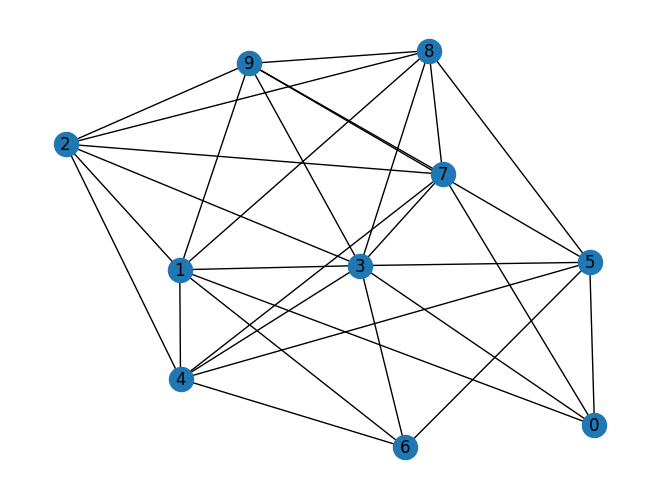

In [2]:
# Create an Erdős-Rényi graph
# G_erdos_renyi = nx.erdos_renyi_graph(10, 0.2)
def create_erdos_renyi_graph(n, p):
    """Returns a $G_{n,p}$ random graph, also known as an Erdős-Rényi graph
    or a binomial graph.
    The $G_{n,p}$ model chooses each of the possible edges with probability $p$.
    """
    assert 0 <= p <= 1, "Probability must be in the range [0, 1]"
    edges = itertools.combinations(range(n), 2)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    for e in edges:
        if np.random.rand() < p:
            G.add_edge(*e)
    return G


er = create_erdos_renyi_graph(10, 0.6)
nx.draw(er, with_labels=True)

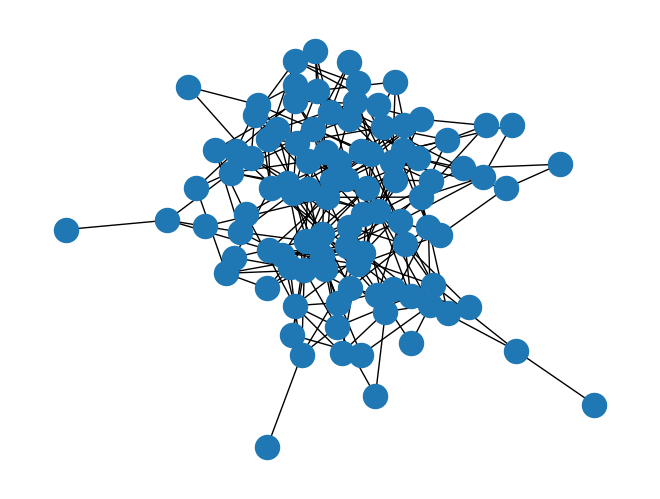

In [3]:
erdos_renyi_graph = create_erdos_renyi_graph(100, 0.05)
nx.draw(erdos_renyi_graph, with_labels=False, pos=nx.spring_layout(erdos_renyi_graph))

**Exponential Random Graph Models (ERGMs)**

ERGMs specify a probability distribution over graphs based on network statistics such as the number of edges, triangles, and $k$-stars. These models inherently follow the Markov property.

A good introduction to ERGMs can be found [here](https://eehh-stanford.github.io/SNA-workshop/ergm-intro.html):

ERGMs stand for Exponential Random Graph Models. The goal of ERGMs is to “describe parsimoniously (e.g., frugally, succinctly) the local selection forces that shape the global structure of a network” (Hunter et al. 2008).

$k$-stars? What are those?

$k$-stars are subgraphs in which a central node is connected to $k$ other nodes. For example, a 2-star is a subgraph with a central node connected to two other nodes. The $k$-star count is a network statistic that counts the number of $k$-stars in a graph.

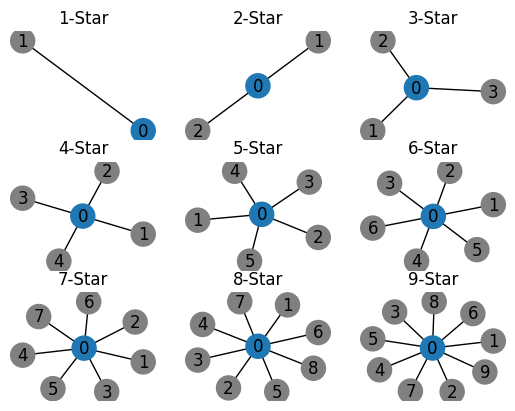

In [4]:
fig, axes = plt.subplots(3, 3)
axes = axes.flatten()
for i, k in enumerate(range(1, 10)):
    G = nx.star_graph(k)
    pos = nx.spring_layout(G)
    node_colors = ["C0"] + ["gray"] * k
    nx.draw(G, pos, ax=axes[i], with_labels=True, node_color=node_colors)
    axes[i].set_title(f"{k}-Star")

In [5]:
# Create an ERGM-like graph using a configuration model
# This is a simplistic approximation, for real ERGMs use a specialized library like `graph-tool` or `ergm` in R
from networkx.generators.degree_seq import configuration_model


def make_ERGM_like_graph(degree_sequence):
    G = configuration_model(degree_sequence)
    G = nx.Graph(G)  # Remove parallel edges
    G.remove_edges_from(nx.selfloop_edges(G))  # Remove self-loops
    return G


def graphical_summary_ERGM_like_graph(G, degree_sequence):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    plt.title("ERGM-like Graph")
    print("ERGM-like Graph - Number of edges:", G.number_of_edges())
    print("ERGM-like Graph - Number of triangles:", sum(nx.triangles(G).values()) // 3)
    requested_degrees = pd.Series(degree_sequence).value_counts().sort_index()
    actual_degrees = pd.Series(dict(G.degree())).value_counts().sort_index()
    fig, axes = plt.subplots(1, 2, figsize=(10, 2), sharey=True)
    requested_degrees.plot(kind="barh", ax=axes[0])
    axes[0].set_title("Requested Degrees")
    actual_degrees.plot(kind="barh", ax=axes[1])
    axes[1].set_title("Actual Degrees")

ERGM-like Graph - Number of edges: 11
ERGM-like Graph - Number of triangles: 2


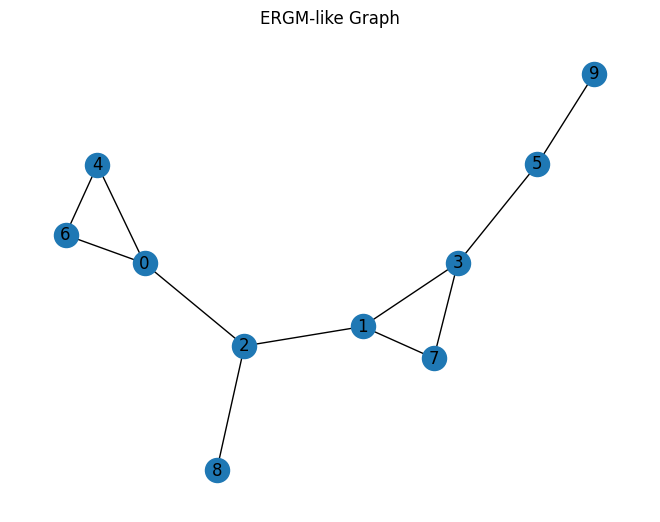

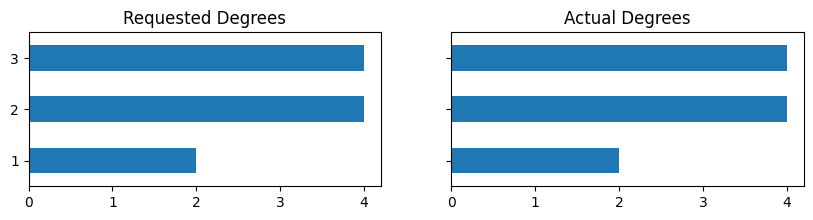

In [6]:
degree_sequence = [3, 3, 3, 3, 2, 2, 2, 2, 1, 1]  # A simple degree sequence
G = make_ERGM_like_graph(degree_sequence)
graphical_summary_ERGM_like_graph(G, degree_sequence)

ERGM-like Graph - Number of edges: 281
ERGM-like Graph - Number of triangles: 46


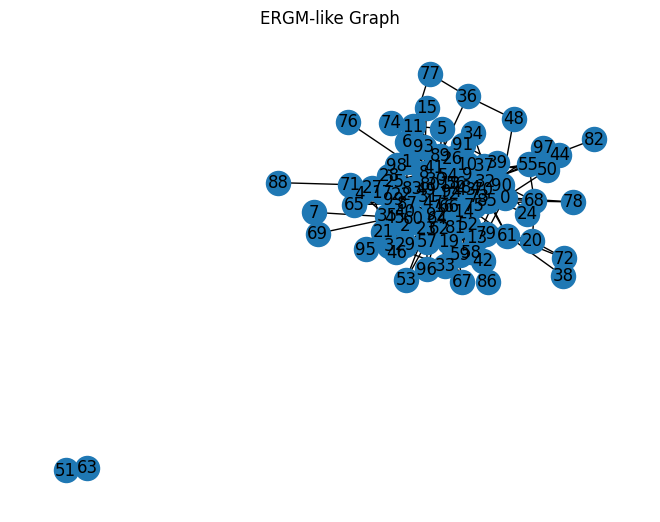

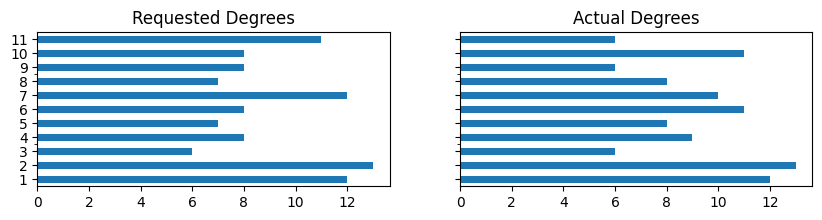

In [7]:
degree_sequence = np.random.randint(1, 12, 100)
if sum(degree_sequence) % 2 != 0:
    # sum of degrees must be even because each edge connects two nodes
    degree_sequence[np.random.randint(0, len(degree_sequence))] += 1
ergm_like_graph = make_ERGM_like_graph(degree_sequence)
graphical_summary_ERGM_like_graph(ergm_like_graph, degree_sequence)

### Examples of Graphs Not Following the Markov Graph Model

**Small-World Networks**:

Small-world networks, like those generated by the Watts-Strogatz model, have a high clustering coefficient and short average path lengths. The presence of an edge depends on local rewiring, which introduces dependencies between edges that violate the Markov property.

In [8]:
# G_small_world = nx.watts_strogatz_graph(100, 2, 0.1)
def watts_strogatz_graph(n, k, p):
    """Returns a Watts–Strogatz small-world graph.

    Parameters
    ----------
    n : int
        The number of nodes
    k : int
        Each node is joined with its `k` nearest neighbors in a ring
        topology.
    p : float
        The probability of rewiring each edge

    Notes
    -----
    First create a ring over $n$ nodes [1]_.  Then each node in the ring is joined
    to its $k$ nearest neighbors (or $k - 1$ neighbors if $k$ is odd).
    Then shortcuts are created by replacing some edges as follows: for each
    edge $(u, v)$ in the underlying "$n$-ring with $k$ nearest neighbors"
    with probability $p$ replace it with a new edge $(u, w)$ with uniformly
    random choice of existing node $w$.
    """
    assert n > k, "k should be greater than n"
    G = nx.Graph()
    nodes = list(range(n))  # nodes are labeled 0 to n-1
    # connect each node to k/2 neighbors
    for j in range(1, k // 2 + 1):
        targets = nodes[j:] + nodes[0:j]  # first j nodes are now last in list
        G.add_edges_from(zip(nodes, targets))
    # rewire edges from each node
    # loop over all nodes in order (label) and neighbors in order (distance)
    # no self loops or multiple edges allowed
    for j in range(1, k // 2 + 1):  # outer loop is neighbors
        targets = nodes[j:] + nodes[0:j]  # first j nodes are now last in list
        # inner loop in node order
        for u, v in zip(nodes, targets):
            if np.random.rand() < p:
                w = np.random.choice(nodes)
                # Enforce no self-loops or multiple edges
                while w == u or G.has_edge(u, w):
                    w = np.random.choice(nodes)
                    if G.degree(u) >= n - 1:
                        break  # skip this rewiring
                else:
                    G.remove_edge(u, v)
                    G.add_edge(u, w)
    return G

In Watts-Strogatz small-world networks, each node is connected to its $k$ nearest neighbors in a ring topology. With probability $p$, each edge is rewired to a uniformly random node, creating shortcuts that reduce the average path length. Larger values of $p$ result in more random edges and a smaller average path length.

Small-World Network - Clustering Coefficient: 0.05295815295815296


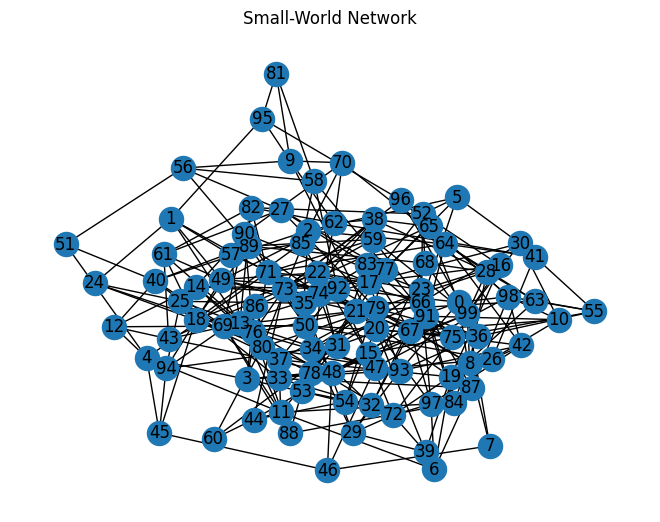

In [9]:
G_small_world = watts_strogatz_graph(n=100, k=6, p=0.9)

pos = nx.spring_layout(G_small_world)
nx.draw(G_small_world, pos, with_labels=True)
plt.title("Small-World Network")
print(
    "Small-World Network - Clustering Coefficient:",
    nx.average_clustering(G_small_world),
)

**Scale-Free Networks**:

Scale-free networks, often modeled by the Barabási-Albert model, have a power-law degree distribution. The preferential attachment mechanism used to generate these networks creates dependencies between edges that do not satisfy the Markov property.


In [10]:
# G_scale_free = nx.barabasi_albert_graph(100, 3)
def barabasi_albert_graph(n, m):
    """Returns a random graph according to the Barabási–Albert preferential attachment model.
    A graph of $n$ nodes is grown by attaching new nodes each with $m$ edges that are preferentially attached to existing nodes with high degree.
    """

    def _random_subset(seq, m):
        """Return m unique elements from seq."""
        targets = set()
        while len(targets) < m:
            x = np.random.choice(seq)
            targets.add(x)
        return targets

    G = nx.empty_graph(m)
    targets = list(range(m))
    repeated_nodes = []
    source = m
    while source < n:
        G.add_edges_from(zip([source] * m, targets))
        repeated_nodes.extend(targets)
        repeated_nodes.extend([source] * m)
        targets = _random_subset(repeated_nodes, m)
        source += 1
    return G

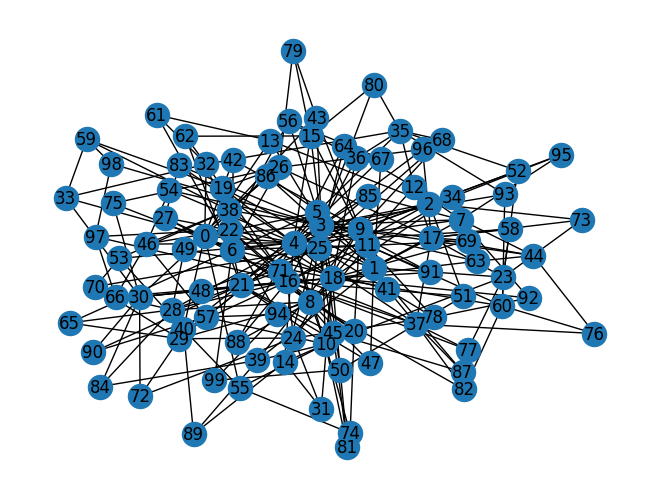

In [11]:
G_scale_free = barabasi_albert_graph(100, 3)
pos = nx.spring_layout(G_scale_free)
nx.draw(G_scale_free, pos, with_labels=True)

The main differences between Barabási-Albert scale-free networks and Strogatz-Watts small-world networks are:
- Scale-free networks have a power-law degree distribution, while small-world networks have a Poisson degree distribution.
- Scale-free networks have a high degree of heterogeneity, with a few nodes having many connections and many nodes having few connections.

None of these models satisfy the Markov property, as the presence of an edge depends on the existing network structure.

### Markov Graphs and Small-World Networks

Small-world networks are characterized by a high clustering coefficient and short average path lengths. These properties are often observed in social networks, where individuals tend to form tightly knit groups with short paths between them.
Strogatz-Watts and Barabási-Albert models lead to Small-world graphs and they do not satisfy the Markov property. Can Markov graphs be used to model small-world networks?

In [12]:
def shortest_path_length_relative_to_nodes(G, n_sample=1000):
    shortest_path_lengths = []
    nodes = list(G.nodes())
    for _ in range(n_sample):
        u, v = np.random.choice(nodes, size=2, replace=False)
        try:
            shortest_path_lengths.append(nx.shortest_path_length(G, u, v))
        except nx.NetworkXNoPath:
            pass
    mes = np.mean(shortest_path_lengths)
    return mes / np.log10(G.number_of_nodes())


def shortest_path_length_relative_to_edges(G, n_sample=1000):
    shortest_path_lengths = []
    nodes = list(G.nodes())
    for _ in range(n_sample):
        u, v = np.random.choice(nodes, size=2, replace=False)
        try:
            shortest_path_lengths.append(nx.shortest_path_length(G, u, v))
        except nx.NetworkXNoPath:
            pass
    mes = np.mean(shortest_path_lengths)
    return mes / np.log10(G.number_of_edges())

In [13]:
summary = [
    {
        "Network": "Erdős-Rényi",
        "Markov Graph": "Yes",
        "# of nodes/edges": f"{erdos_renyi_graph.number_of_nodes()}/{erdos_renyi_graph.number_of_edges()}",
        "Shortest Path Length (rel. to nodes)": shortest_path_length_relative_to_nodes(
            erdos_renyi_graph
        ),
        "Shortest Path Length (rel. to edges)": shortest_path_length_relative_to_edges(
            erdos_renyi_graph
        ),
        "Clustering Coefficient": nx.average_clustering(erdos_renyi_graph),
        "Transitivity": nx.transitivity(erdos_renyi_graph),
    },
    {
        "Network": "ERGM-like",
        "Markov Graph": "Yes",
        "# of nodes/edges": f"{ergm_like_graph.number_of_nodes()}/{ergm_like_graph.number_of_edges()}",
        "Shortest Path Length (rel. to nodes)": shortest_path_length_relative_to_nodes(
            ergm_like_graph
        ),
        "Shortest Path Length (rel. to edges)": shortest_path_length_relative_to_edges(
            ergm_like_graph
        ),
        "Clustering Coefficient": nx.average_clustering(ergm_like_graph),
        "Transitivity": nx.transitivity(ergm_like_graph),
    },
    {
        "Network": "Small-World",
        "Markov Graph": "No",
        "# of nodes/edges": f"{G_small_world.number_of_nodes()}/{G_small_world.number_of_edges()}",
        "Shortest Path Length (rel. to nodes)": shortest_path_length_relative_to_nodes(
            G_small_world
        ),
        "Shortest Path Length (rel. to edges)": shortest_path_length_relative_to_edges(
            G_small_world
        ),
        "Clustering Coefficient": nx.average_clustering(G_small_world),
        "Transitivity": nx.transitivity(G_small_world),
    },
    {
        "Network": "Scale-Free",
        "Markov Graph": "No",
        "# of nodes/edges": f"{G_scale_free.number_of_nodes()}/{G_scale_free.number_of_edges()}",
        "Shortest Path Length (rel. to nodes)": shortest_path_length_relative_to_nodes(
            G_scale_free
        ),
        "Shortest Path Length (rel. to edges)": shortest_path_length_relative_to_edges(
            G_scale_free
        ),
        "Clustering Coefficient": nx.average_clustering(G_scale_free),
        "Transitivity": nx.transitivity(G_scale_free),
    },
]
summary = pd.DataFrame(summary).set_index("Network").round(3)

In [14]:
summary

,Markov Graph,# of nodes/edges,Shortest Path Length (rel. to nodes),Shortest Path Length (rel. to edges),Clustering Coefficient,Transitivity
Network,,,,,,
Erdős-Rényi,Yes,100/250,1.494,1.241,0.054,0.060
ERGM-like,Yes,100/281,1.433,1.168,0.059,0.076
Small-World,No,100/300,1.368,1.099,0.053,0.048
Scale-Free,No,100/291,1.288,1.042,0.158,0.102


We can see that graphs that follow Markov graph models are also capable of exhibiting small-world properties. The Erdős-Rényi and ERGM-like graphs have a short average path length relative to the number of nodes and edges, similar to the small-world network. However, the clustering

## Conclusion

In this notebook, we explored Markov graphs and their application in modeling network structures. We examined how probability models for graphs, such as Erdős-Rényi graphs and Exponential Random Graph Models (ERGMs), satisfy the Markov property. These models can capture certain dependencies in network data while maintaining conditional independence among non-adjacent edges.

We also looked at small-world networks, characterized by high clustering coefficients and short average path lengths. Through examples of the Watts-Strogatz and Barabási-Albert models, we demonstrated that small-world networks do not satisfy the Markov property due to dependencies introduced by local rewiring and preferential attachment mechanisms.

Although Markov graphs can approximate some aspects of small-world networks, they may not fully capture the intricate dependencies that define small-world properties. This highlights the importance of selecting appropriate models based on the specific characteristics and dependencies of the network being studied.

For more details, refer to [Snijders, Transitivity and Triads](https://www.stats.ox.ac.uk/~snijders/Trans_Triads_ha.pdf).